In [1]:
# Estabelece a conexão com o Google Drive, para permitir a leitura do Data Frame
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
# Faz a importação das bibliotecas necessárias para o script
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

In [24]:
# Carrega o Data Frame de acidentes fatais na Austrália
df = pd.read_csv('/content/gdrive/My Drive/topicos-iv/resources/crash_data.csv', sep=',', low_memory=False)

In [25]:
# Remove linhas que não tenham os dados completos
df = df.dropna()

In [26]:
df = df[[ 'Dayweek', 'Time of day', 'Age Group']]

# Converte os valores da coluna Dayweek em categorias numéricas
encoder = OrdinalEncoder(categories=[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']])
df.loc[:, 'Dayweek'] = encoder.fit_transform(df[['Dayweek']])

# Converte os valores da coluna Crash Type em categorias numéricas
encoder = OrdinalEncoder(categories=[['Night', 'Day']])
df.loc[:, 'Time of day'] = encoder.fit_transform(df[['Time of day']])

# Drop rows with missing values in 'Age Group' before applying OrdinalEncoder
df.dropna(subset=['Age Group'], inplace=True)

class_names = df['Age Group'].astype('category').cat.categories.tolist()

In [27]:
# Separando as variáveis independentes e a variável dependente
X = df[['Dayweek', 'Time of day']]
y = df['Age Group']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df[['Dayweek', 'Time of day']], df['Age Group'], test_size=0.2, random_state=42
)

In [28]:
# Criando a árvore de decisão
clf = DecisionTreeClassifier()

In [29]:
# Treinando a árvore de decisão
clf = clf.fit(X, y)

In [30]:
# Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test)

In [31]:
# Avaliando a precisão do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.33


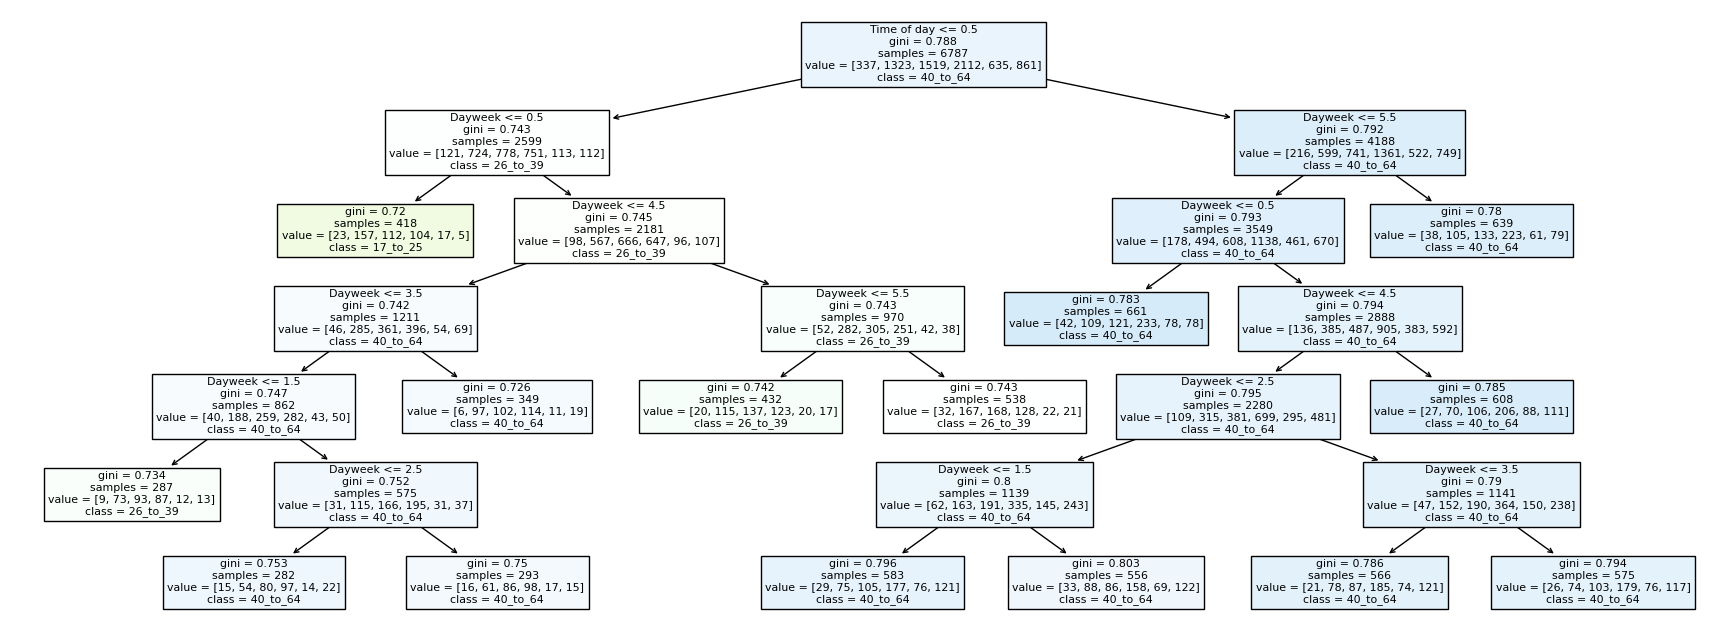



|--- Time of day <= 0.50
|   |--- Dayweek <= 0.50
|   |   |--- class: 17_to_25
|   |--- Dayweek >  0.50
|   |   |--- Dayweek <= 4.50
|   |   |   |--- Dayweek <= 3.50
|   |   |   |   |--- Dayweek <= 1.50
|   |   |   |   |   |--- class: 26_to_39
|   |   |   |   |--- Dayweek >  1.50
|   |   |   |   |   |--- Dayweek <= 2.50
|   |   |   |   |   |   |--- class: 40_to_64
|   |   |   |   |   |--- Dayweek >  2.50
|   |   |   |   |   |   |--- class: 40_to_64
|   |   |   |--- Dayweek >  3.50
|   |   |   |   |--- class: 40_to_64
|   |   |--- Dayweek >  4.50
|   |   |   |--- Dayweek <= 5.50
|   |   |   |   |--- class: 26_to_39
|   |   |   |--- Dayweek >  5.50
|   |   |   |   |--- class: 26_to_39
|--- Time of day >  0.50
|   |--- Dayweek <= 5.50
|   |   |--- Dayweek <= 0.50
|   |   |   |--- class: 40_to_64
|   |   |--- Dayweek >  0.50
|   |   |   |--- Dayweek <= 4.50
|   |   |   |   |--- Dayweek <= 2.50
|   |   |   |   |   |--- Dayweek <= 1.50
|   |   |   |   |   |   |--- class: 40_to_64
|   |   |

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Exportando a árvore de decisão para uma imagem
plt.figure(figsize=(22,8))
plot_tree(clf, feature_names=['Dayweek', 'Time of day'], class_names=class_names, filled=True)
plt.show()

# Exportando a árvore de decisão para um formato de texto descritivo
tree_rules = export_text(clf, feature_names=['Dayweek', 'Time of day'])
print("\n")
print(tree_rules)